Database connection, importing data and storing in HDFStore

In [1]:
import mysql.connector as sql
import pandas as pd
from configparser import ConfigParser
from pandas import HDFStore,DataFrame

In [ ]:
db_connection = sql.connect(host='104.197.253.225', database='secdb', user='cs572', password='cs572')
db_cursor = db_connection.cursor()

query = 'SELECT * FROM all_physical'
db_cursor.execute(query)
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)
pdata = pd.read_sql(query, db_connection)
db_connection.close()

In [ ]:
pdata['Timestamp'] = pdata['Timestamp'].apply(pd.to_datetime)
pdata['EVENT'] = pdata['EVENT'].astype('category')

In [ ]:
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
pdata[NumFeatures] = pdata[NumFeatures].apply(pd.to_numeric)

In [ ]:
pdata['EVENT'] = pdata['EVENT'].str.replace('A ttack', 'Attack')

In [ ]:
store = HDFStore('store.h5')
store['pdata'] = pdata  # save it
store.close()

Reading the stored HDF

In [3]:
store = HDFStore('store.h5')
pdata = pd.read_hdf(store)
pdata = pdata.sort_values('Timestamp')

In [4]:
pdata.shape

(946719, 53)

In [5]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT5

Loading libraries

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None

In [7]:
bool_cols = [col for col in pdata 
             if pdata[[col]].dropna().isin([0, 1]).all().values]

In [8]:
pdata[bool_cols].describe()

,P202,P401,P404,P502,P601,P603
count,946719.0,946719.0,946719.0,946719.0,946719.0,946719.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
pdata.drop(bool_cols, axis = 1, inplace = True)

In [10]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
for col in pdata:
    if(pdata[[col]].dropna().isin([1, 2]).all().values):
        catFeatures.append(col)
        pdata[col].astype('category')
NumFeatures = [x for x in NumFeatures if x not in catFeatures ]
len(NumFeatures) + len(catFeatures) + len(bool_cols)

53

Loading libraries for PCA

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

PCA for only Numeric Variables

In [12]:
X = scale(pdata[NumFeatures[1:]])
pca = PCA(n_components=31)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[ 37.45  48.8   58.16  66.37  72.77  77.94  81.95  85.25  88.1   90.14
  91.73  93.26  94.58  95.7   96.55  97.38  98.08  98.65  99.01  99.24
  99.44  99.57  99.68  99.78  99.86  99.93  99.98 100.   100.   100.   100.  ]


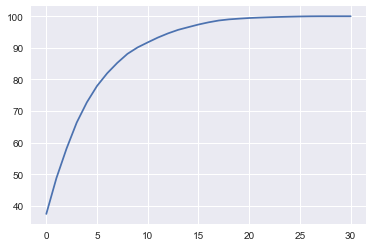

In [14]:
plt.plot(var1)

PCA for numeric features and categorical features that change valueX_cat = pd.get_dummies(pdata , columns=catFeatures[1:])

In [15]:
X_cat = pd.get_dummies(pdata , columns=catFeatures[1:])

In [18]:
dummies = ['P101_1', 'P101_2','P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2']

In [19]:
X = X_cat[NumFeatures[1:] + dummies]

In [21]:
X[NumFeatures[1:]]= scale(X[NumFeatures[1:]])
pca_wobool = PCA(n_components=59)
pca_wobool.fit(X)

PCA(copy=True, iterated_power='auto', n_components=59, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
var_wobool = pca_wobool.explained_variance_ratio_
var1_wobool = np.cumsum(np.round(var_wobool, decimals=4)*100)
print(var1_wobool)

[  36.99   49.58   58.63   66.93   73.03   78.09   81.93   85.33   88.18
   90.17   91.68   93.13   94.4    95.48   96.29   97.08   97.75   98.31
   98.65   98.88   99.1    99.3    99.44   99.54   99.63   99.72   99.79
   99.85   99.89   99.92   99.94   99.96   99.97   99.98   99.99  100.
  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01
  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01
  100.01  100.01  100.01  100.01  100.01]


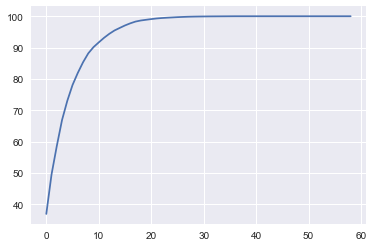

In [24]:
plt.plot(var1_wobool)

PCA for all variables

In [25]:
pdata = pd.read_hdf(store)
pdata = pdata.sort_values('Timestamp')

In [26]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
for col in pdata:
    if(pdata[[col]].dropna().isin([1, 2]).all().values):
        catFeatures.append(col)
        pdata[col].astype('category')
NumFeatures = [x for x in NumFeatures if x not in catFeatures ]

In [29]:
X_cat_wbool = pd.get_dummies(pdata , columns=catFeatures[1:])

In [35]:
dummies = ['P101_1', 'P101_2',
       'P102_1', 'P102_2', 'P201_1', 'P201_2', 'P202_1', 'P203_1', 'P203_2',
       'P204_1', 'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1',
       'P301_2', 'P302_1', 'P302_2', 'P401_1', 'P402_1', 'P402_2', 'P403_1',
       'P403_2', 'P404_1', 'UV401_1', 'UV401_2', 'P501_1', 'P501_2', 'P502_1',
       'P601_1', 'P602_1', 'P602_2', 'P603_1']

In [37]:
X = X_cat_wbool[NumFeatures[1:] + dummies]

In [39]:
X_cat_wbool[NumFeatures[1:]] = scale(X_cat_wbool[NumFeatures[1:]])
pca_wbool = PCA(n_components=59, svd_solver='full')
pca_wbool.fit(X)

PCA(copy=True, iterated_power='auto', n_components=59, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [42]:
var_wbool = pca_wbool.explained_variance_ratio_
var1_wbool=np.cumsum(np.round(var_wbool, decimals=4)*100)
print(var1_wbool)

[  36.99   49.58   58.63   66.93   73.03   78.09   81.93   85.33   88.18
   90.17   91.68   93.13   94.4    95.48   96.29   97.08   97.75   98.31
   98.65   98.88   99.1    99.3    99.44   99.54   99.63   99.72   99.79
   99.85   99.89   99.92   99.94   99.96   99.97   99.98   99.99  100.
  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01
  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01  100.01
  100.01  100.01  100.01  100.01  100.01]


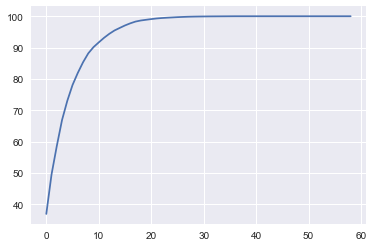

In [43]:
plt.plot(var1_wbool)